Baritone Guitar Standard Tuning Frequencies (Hz): [61.735412657015516, 82.40688922821748, 110.0, 146.8323839587038, 184.9972113558172, 246.94165062806206]


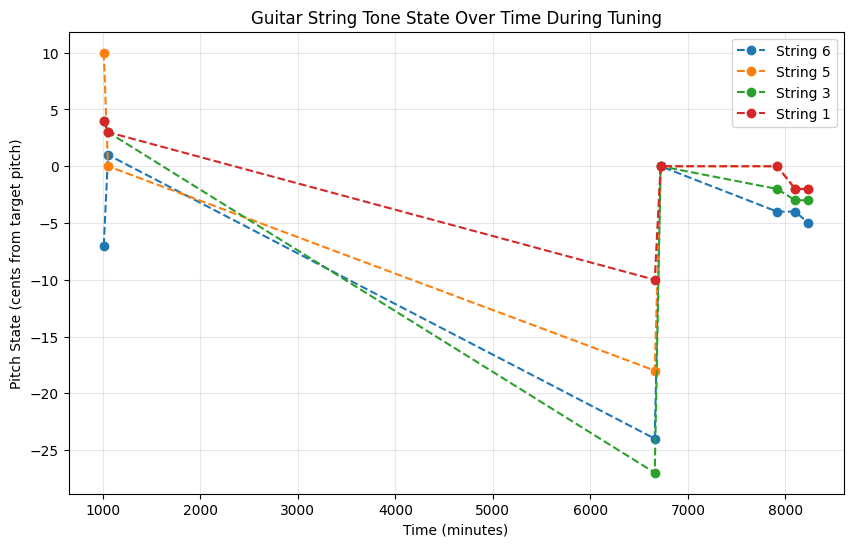


STATISTICS SUMMARY
Mean Pitch Variance (by time)..................... [  2.75   1.75 -19.75   0.    -1.5   -2.75  -3.  ]
Mean Pitch Variance (by string)................... [-6.14285714 -1.71428571 -4.         -1.        ]
Std Dev Pitch Variance (by time).................. [6.13901458 1.29903811 6.49519053 0.         1.6583124  0.8291562
 1.22474487]
Std Dev Pitch Variance (by string)................ [7.73542078 7.66651878 9.73946317 4.24264069]
Mean Time......................................... 5670.43
Std Dev Time...................................... 2991.73

PITCH VARIANCE STATE BY MEASUREMENT
               String 6  String 5  String 3  String 1
Measurement 1        -7        10         4         4
Measurement 2         1         0         3         3
Measurement 3       -24       -18       -27       -10
Measurement 4         0         0         0         0
Measurement 5        -4         0        -2         0
Measurement 6        -4        -2        -3        -2
Measurement 7    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
# times: [day, hour, min] for each measurement
# pitch_variance_state: 4 measurements × 4 strings matrix
# cents of octave units: (essentially percent deviance from target semi tone tolerance)
    # 12 tones per octave naturals plus sharps 
    # each octave is a doubling of frequency, so each semitone is the 12th root of 2
    # each twelfth root 2 integer exponent of frequency gain is split into 100 cents of one semitone
    # octave is 1200 cents total, each semi tone is 100 cents
hertz_to_cents = lambda f1, f2: 1200 * np.log2(f2 / f1)
cents_to_hertz = lambda f1, cents: f1 * (2 ** (cents / 1200))
#refrence octave frequencies for A4=440Hz standard, for interpolation to other octaves or within octave 
def notes_to_freq(actual_notes, actual_octaves, A4_freq=440.0):#works lmao
    octave=4
    note_range=['A','A#','B','C','C#','D','D#','E','F','F#','G','G#']
    A4_standard=A4_freq # Standard tuning frequency for A4 in Hz
    A_sharp4_freq=A4_standard * (2 ** ((1) / 12))  # A#4 is 1 semitone above A4
    B4_freq=A4_standard * (2 ** ((2) / 12))  # B3 is 2 semitones above A4
    C4_freq=A4_standard * (2 ** ((3-12) / 12))  # C4 is 3 semitones below A4
    C_sharp4_freq=A4_standard * (2 ** ((4-12) / 12))  # C#3 is 4 semitones above A4
    D4_freq=A4_standard * (2 ** ((5-12) / 12))  # D3 is 5 semitones above A4
    D_sharp4_freq=A4_standard * (2 ** ((6-12) / 12))  # D#3 is 6 semitones above A4
    E4_freq=A4_standard * (2 ** ((7-12) / 12))  # E3 is 7 semitones above A4
    F4_freq=A4_standard * (2 ** ((8-12) / 12))  # F3 is 8 semitones above A4
    F_sharp4_freq=A4_standard * (2 ** ((9-12) / 12))  # F#3 is 9 semitones above A4
    G4_freq=A4_standard * (2 ** ((10-12) / 12))  # G4 is 1 semitones below A4
    G_sharp4_freq=A4_standard * (2 ** ((11-12) / 12))  # G#3 is 11 semitones above A4
  
    Octave_A4_A3_freqs=[A4_standard,A_sharp4_freq,B4_freq,C4_freq,C_sharp4_freq,D4_freq,D_sharp4_freq,E4_freq,F4_freq,F_sharp4_freq,G4_freq,G_sharp4_freq]
    i=0
    note_freqs=[]
    for note in actual_notes:
        
        note_index=note_range.index(note)
        octave_diffs=octave-actual_octaves[i]
        note_freqs.append(Octave_A4_A3_freqs[note_index] * (2 ** (-octave_diffs)))
        i += 1
    return note_freqs


#need freqs for range B1 to B3
baritone_tuning_notes=['B','E','A','D','F#','B']
octave_range_baritone=[1,2,2,3,3,3]
baritone_tuning_freqs=notes_to_freq(baritone_tuning_notes,octave_range_baritone,A4_freq=440.0)
print("Baritone Guitar Standard Tuning Frequencies (Hz):", baritone_tuning_freqs)
#for each string, pitch variance state(f2) is in cents from target pitch freq in hertz(f1)
#base data
times = [[0,16,49],[0,17,33],[4,15,0],[4,16,0],[5,11,55],[5,15,1],[5,17,15]]
pitch_variance_state = np.array([[-7,10,4,4],[1,0,3,3],[-24,-18,-27,-10],[0,0,0,0],[-4,0,-2,0],[-4,-2,-3,-2],[-5,-2,-3,-2]])
known_pitch_variance_state_uncert=np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[2,2,2,2],[1,2,2,1],[1,2,1,1],[1,1,1,0]])
# Convert times to minutes
times_min = np.array(times)[:,0]*24*60 + np.array(times)[:,1]*60 + np.array(times)[:,2]


#stats data
mean_pitch_variance_state=[np.mean(pitch_variance_state,axis=1),np.mean(pitch_variance_state,axis=0)]
std_pitch_variance_state=[np.std(pitch_variance_state,axis=1),np.std(pitch_variance_state,axis=0)]
mean_time_min=np.mean(times_min)
std_time_min=np.std(times_min)



times_min_log=np.log10(times_min+1)
pitch_variance_state_log=np.log10(np.abs(pitch_variance_state)+1)
n_strings = 4
string_names = ['String 6', 'String 5', 'String 3', 'String 1']




# Plot all strings on same axes
plt.figure(figsize=(10, 6))
for string in range(n_strings):
    plt.plot(times_min, pitch_variance_state[:, string], marker='o', linestyle='--', label=string_names[string])

plt.xlabel('Time (minutes)')
plt.ylabel('Pitch State (cents from target pitch)')
plt.title('Guitar String Tone State Over Time During Tuning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Create statistics table
stats_data = {
    'Metric': [
        'Mean Pitch Variance (by time)',
        'Mean Pitch Variance (by string)',
        'Std Dev Pitch Variance (by time)',
        'Std Dev Pitch Variance (by string)',
        'Mean Time',
        'Std Dev Time'
    ],
    'Values': [
        mean_pitch_variance_state[0],
        mean_pitch_variance_state[1],
        std_pitch_variance_state[0],
        std_pitch_variance_state[1],
        mean_time_min,
        std_time_min
    ]
}

# Display as formatted table
print("\n" + "="*80)
print("STATISTICS SUMMARY")
print("="*80)
for metric, value in zip(stats_data['Metric'], stats_data['Values']):
    if isinstance(value, np.ndarray):
        print(f"{metric:.<50} {value}")
    else:
        print(f"{metric:.<50} {value:.2f}")

# Also create a DataFrame for better formatting
print("\n" + "="*80)
print("PITCH VARIANCE STATE BY MEASUREMENT")
print("="*80)
measurement_df = pd.DataFrame(
    pitch_variance_state,
    columns=['String 6', 'String 5', 'String 3', 'String 1'],
    index=[f'Measurement {i+1}' for i in range(len(times))]
)
print(measurement_df)

print("\n" + "="*80)
print("MEASUREMENT TIMES (minutes)")
print("="*80)
time_df = pd.DataFrame(
    times_min,
    columns=['Minutes'],
    index=[f'Measurement {i+1}' for i in range(len(times))]
)
print(time_df)

In [ ]:
def string_tension_equation(frequency, scale_length, mass_per_unit_length=None):
    """
    Calculate the tension in a guitar string using the formula:
    T = (2 * L * f)^2 * μ
    where:
    T = tension (Newtons)
    L = scale length (meters)
    f = frequency (Hz)
    μ = mass per unit length (kg/m)
    """
    T = (2 * scale_length * frequency) ** 2 * mass_per_unit_length
    return T